(60000, 28, 28) (60000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/6
938/938 - 1s - loss: 0.2969 - accuracy: 0.9175
Epoch 2/6
938/938 - 1s - loss: 0.1358 - accuracy: 0.9604
Epoch 3/6
938/938 - 1s - loss: 0.0946 - accuracy: 0.9727
Epoch 4/6
938/938 - 1s - loss: 0.0731 - accuracy: 0.9783
Epoch 5/6
938/938 - 1s - loss: 0.0571 - accuracy: 0.9832
Epoch 6/6
938/938 - 1s - loss: 0.0473 - accuracy: 0.9858
157/157 

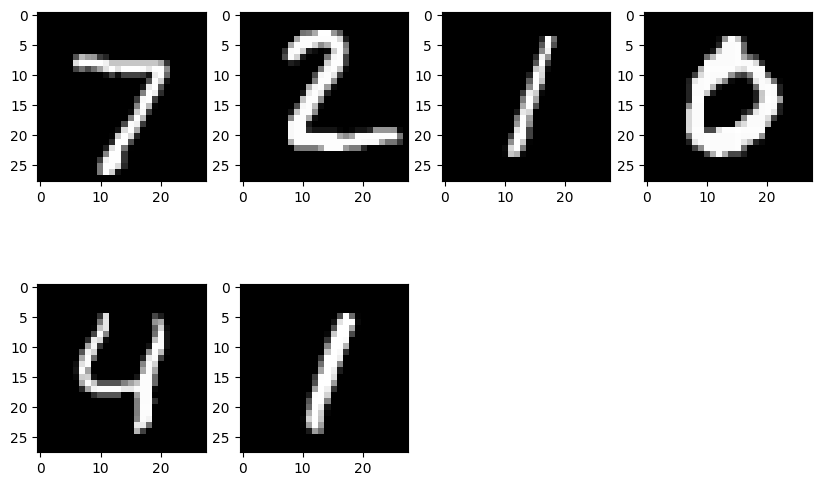

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

plt.figure(figsize=(10,10))


for i in range(6):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[i],cmap='gray')


# Os valores vão de:0 ate 255, tem que ser 0 e 1
# Normalize Data -> 0,255 --> 0,1 
# train recebe train/255 e teste recebe teste/255
x_train, x_test = x_train/255.0, x_test / 255.0

#modelo
model = keras.models.Sequential([
    # Sequential permite empilhar camadas de forma Sequencial
    keras.layers.Flatten(input_shape=(28,28)), # Converte imagens de 28x28px em um vetor 1d
    keras.layers.Dense(128,activation='relu'), # 2 Camada da rede, 128 Neurônios, Falo mais sobre activation abaixo
    
    
    
    # Sigmoid -> retorna valores entre 0 e 1 Util pra classif. binária -> probab. sigmoid(x) = 1/(1+e**(-x))
    # Tangente Hiperbólica(Tanh)-> Versão Estendida de Sigmoid, retorna entre -1 e 1.
    # Unidade Linear Retificada(ReLU) -> retorna 0 pra negativo e a entrada pra positivo (x) = max(0,x)
    # Leaky ReLU->permite um pequeno gradiente pra negativos enves de zerar.
    # x, if x > 0
    # a * x, if x <= 0
    
    keras.layers.Dense(10), # 10 neuronios -> Opções de resposta ( 0 a 9 )  
    # esses valores-resposta, estão não normalizados, que abaixo em Softmax() tornar-se-ão probabilidades

])

print(model.summary())
# O Modelo pode ser programado assim também:

#model = keras.Sequential()
#model.add(keras.layers.Flatten(input_shape=(28,28)))
#model.add(keras.layers.Dense(128,activation='relu'))
#model.add(keras.layers.Dense(10))

# Perdas e otimizações

# y = 0, y =[1,0,0,0,0,0,0,0,0]

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001) # Há vários otimizadores, aqui usamos o Adam
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

# treinando

batch_size = 64
epochs = 6
                                                                                                               # verbose 1 -> progress bar
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, shuffle=True,verbose=2) # Shuffle sempre é true # verbose -> 0 -> no output 2-> normal
#evaulate
                            
model.evaluate(x_test,y_test,batch_size=batch_size,verbose=2) # retorna o valor teste

#Predicões

probability_model = keras.models.Sequential([
    # Aqui podemos passar um modelo inteiro
    model, 
    # Softmax -> Usada na camada de saída de uma rede neural pra classificação em multiclasse
    # Transforma as saídas da rede em uma distribuição de probabilidade
    keras.layers.Softmax()
])
        
#predictions = probability_model(x_test) # predição = modelo probabilistico passando o teste como parametro,
#pred0 = predictions[0]
#print(pred0)
#label0 = np.argmax(pred0)
#print(label0)

# Da pra juntar os 2 aqui:
# model + softmax
predictions = model.predict(x_test,batch_size=batch_size)
predictions = tf.nn.softmax(predictions)


pred05s = predictions[0:6]
#print(pred05s.shape)
label05s = np.argmax(pred05s, axis=1)
print(label05s)

#          CONCLUSÕES:
# O programa não trata uma imagem que está em uma qualidade baixa e pode ter respostas difusas [7 2 1 0 4 1 4 9 5 9 0] || [7 2 1 0 4 1 4 9 6 9 0]
# 0.9717 -> sigmoid
# 0.9861 -> relu Obteve um melhor desempenho
# 0.9848 -> tahn
#
#